In [1]:
import torch
import torchvision
import os
import getpass
if getpass.getuser() == 'vscode':       # Running in container
    os.chdir('/workspaces/kornia/')
else:                                   # Running in virtual environment
    os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/'))
print(os.getcwd())
import sys
sys.path.append(os.getcwd())
cwd_path = os.getcwd()

/workspaces/kornia


In [2]:
if getpass.getuser() == 'vscode':       # Running in container
    os.chdir('/workspaces/kornia/test')
else:                                   # Running in virtual environment
    os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/test'))
from geometry.nerf.test_rays import create_one_camera

os.chdir(cwd_path)

In [3]:
from kornia.geometry.nerf.nerf_solver import NerfSolver
from torchvision.io import read_image
import matplotlib.pyplot as plt

torch.Size([756, 1008, 3])

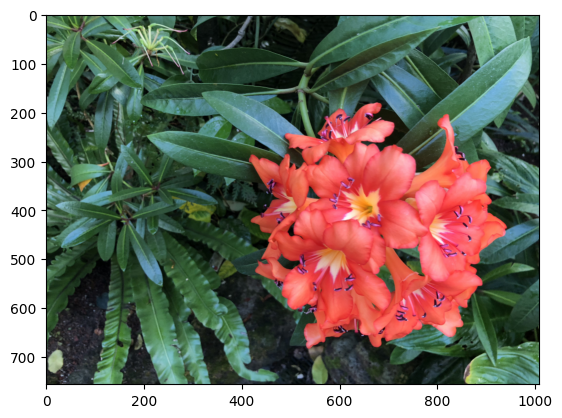

In [4]:
img_paths = ['kornia/geometry/nerf/kornia_nerf_data/flower_4/images/image001.png']

transform = torchvision.transforms.Resize((250))
imgs: torch.tensor = []
for img_path in img_paths:
    img = read_image(img_path)
    # img = transform(img)
    imgs.append(img)

img_plt = torch.permute(imgs[0], (1, 2, 0))
plt.imshow(img_plt)
img_plt.shape

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cameras = create_one_camera(imgs[0].shape[1], imgs[0].shape[2], device)

nerf_obj = NerfSolver(device=device)
num_img_rays = 1024
nerf_obj.init_training(cameras=cameras, min_depth=0., max_depth=3., ndc=True, imgs=imgs, num_img_rays=num_img_rays, 
                       batch_size=num_img_rays, num_ray_points=51)

nerf_obj.run(num_epochs=1000)

cpu
Epoch: 0: epoch_psnr = 7.6789509693238935
Epoch: 10: epoch_psnr = 12.761532975395692
Epoch: 20: epoch_psnr = 12.821391690828891
Epoch: 30: epoch_psnr = 13.835909709367586
Epoch: 40: epoch_psnr = 13.676300614685708
Epoch: 50: epoch_psnr = 13.905165926065408
Epoch: 60: epoch_psnr = 14.254932775567308
Epoch: 70: epoch_psnr = 14.587451430337378
Epoch: 80: epoch_psnr = 14.865581325867353
Epoch: 90: epoch_psnr = 14.13966461463156
Epoch: 100: epoch_psnr = 15.140909964679095
Epoch: 110: epoch_psnr = 15.04862480393005
Epoch: 120: epoch_psnr = 15.34172893784033


KeyboardInterrupt: 

In [7]:
img_rendered = nerf_obj.render_views(cameras)[0]

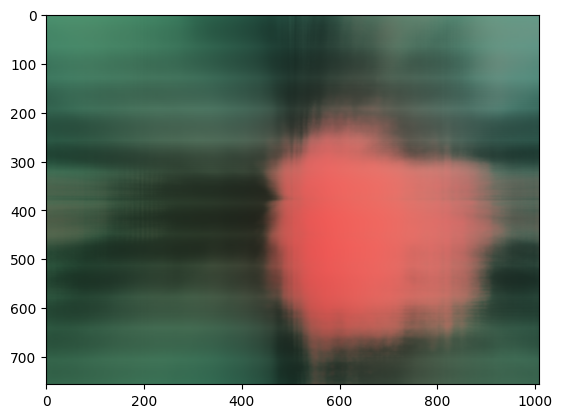

In [9]:
plt.imshow(img_rendered)